### Unsupervised Learning: Principal Component Analysis 

- Dataset: Iris dataset
- Learning Date: 29-Aug-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

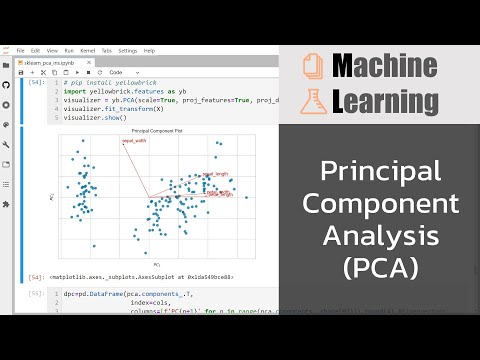

In [2]:
# import libraries

from IPython.display import YouTubeVideo
YouTubeVideo('z8APHNo1iA4', width=720, height=405)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
pd.Timestamp.now()

Timestamp('2023-08-29 07:32:02.999614')

In [6]:
# read data from Aj. Praset's Github to a dataframe

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
141,6.9,3.1,5.1,2.3,virginica
82,5.8,2.7,3.9,1.2,versicolor
137,6.4,3.1,5.5,1.8,virginica
44,5.1,3.8,1.9,0.4,setosa
105,7.6,3.0,6.6,2.1,virginica
0,5.1,3.5,1.4,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

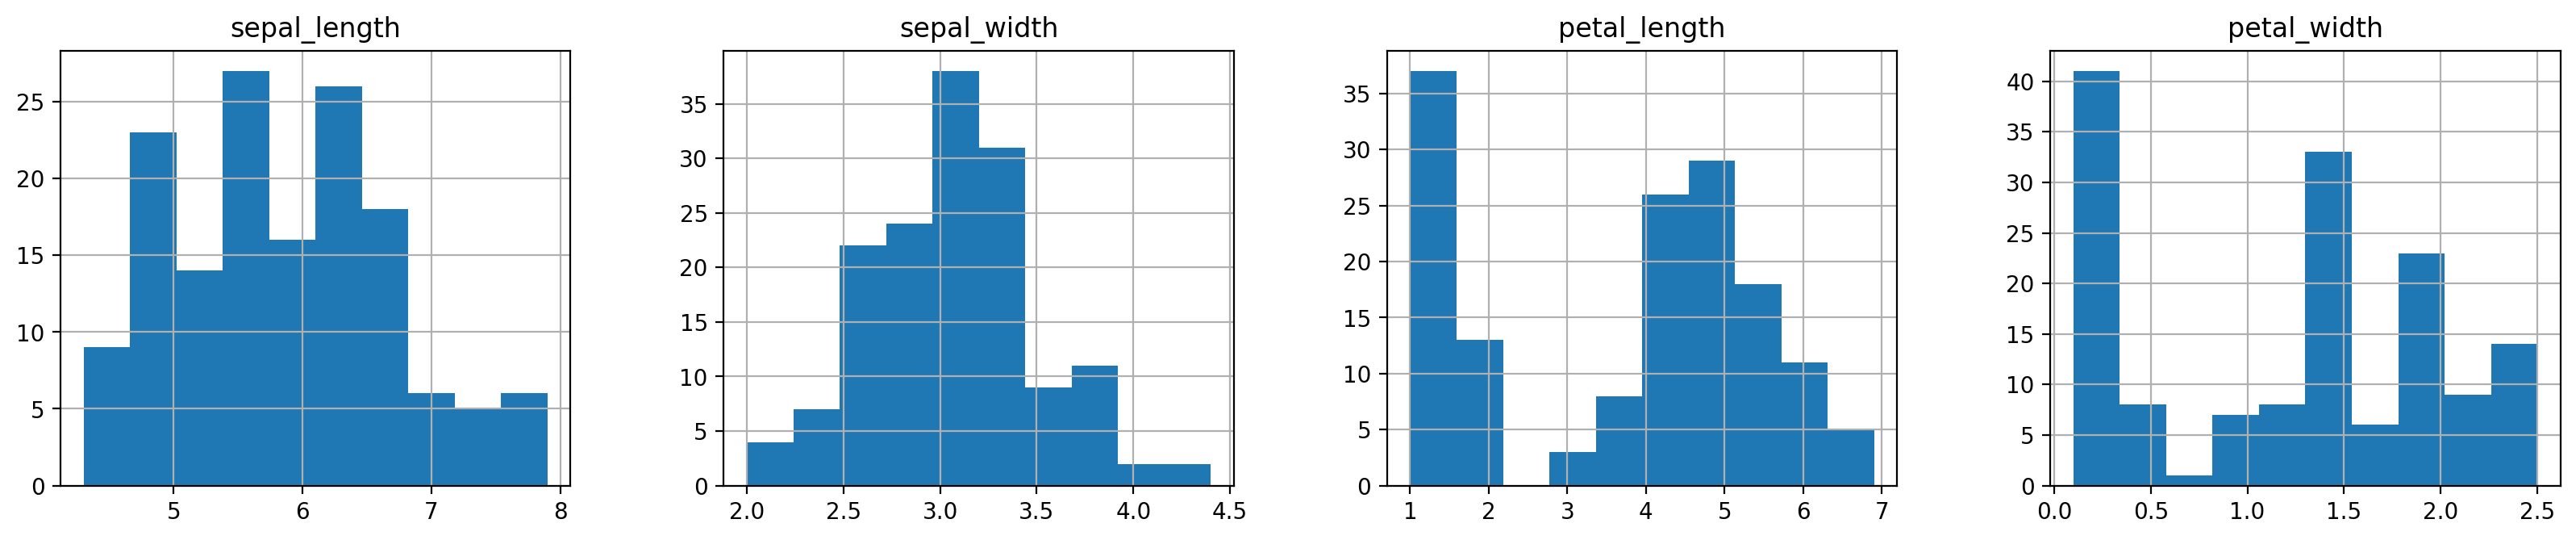

In [11]:
df[cols].hist(layout = (1, len(cols)), figsize = (5 * len(cols), 3.5));

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [13]:
dcorr = df[cols].corr()
dcorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [15]:
mask = np.zeros_like(dcorr)
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
mask.shape

(4, 4)

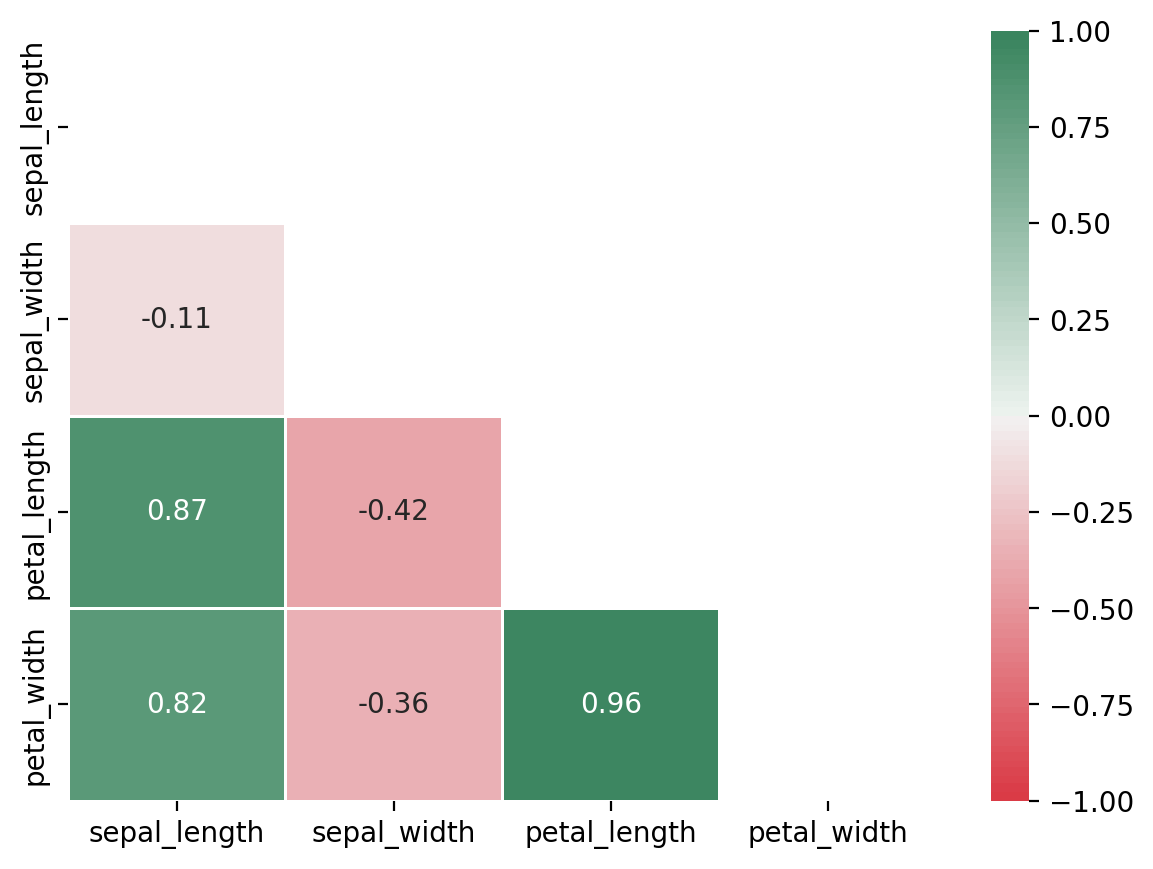

In [17]:
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap = sns.diverging_palette(10, 145, n = 100), 
            vmin = -1, vmax = 1, center = 0, linewidths = 1, annot = True, mask = mask, ax = ax);

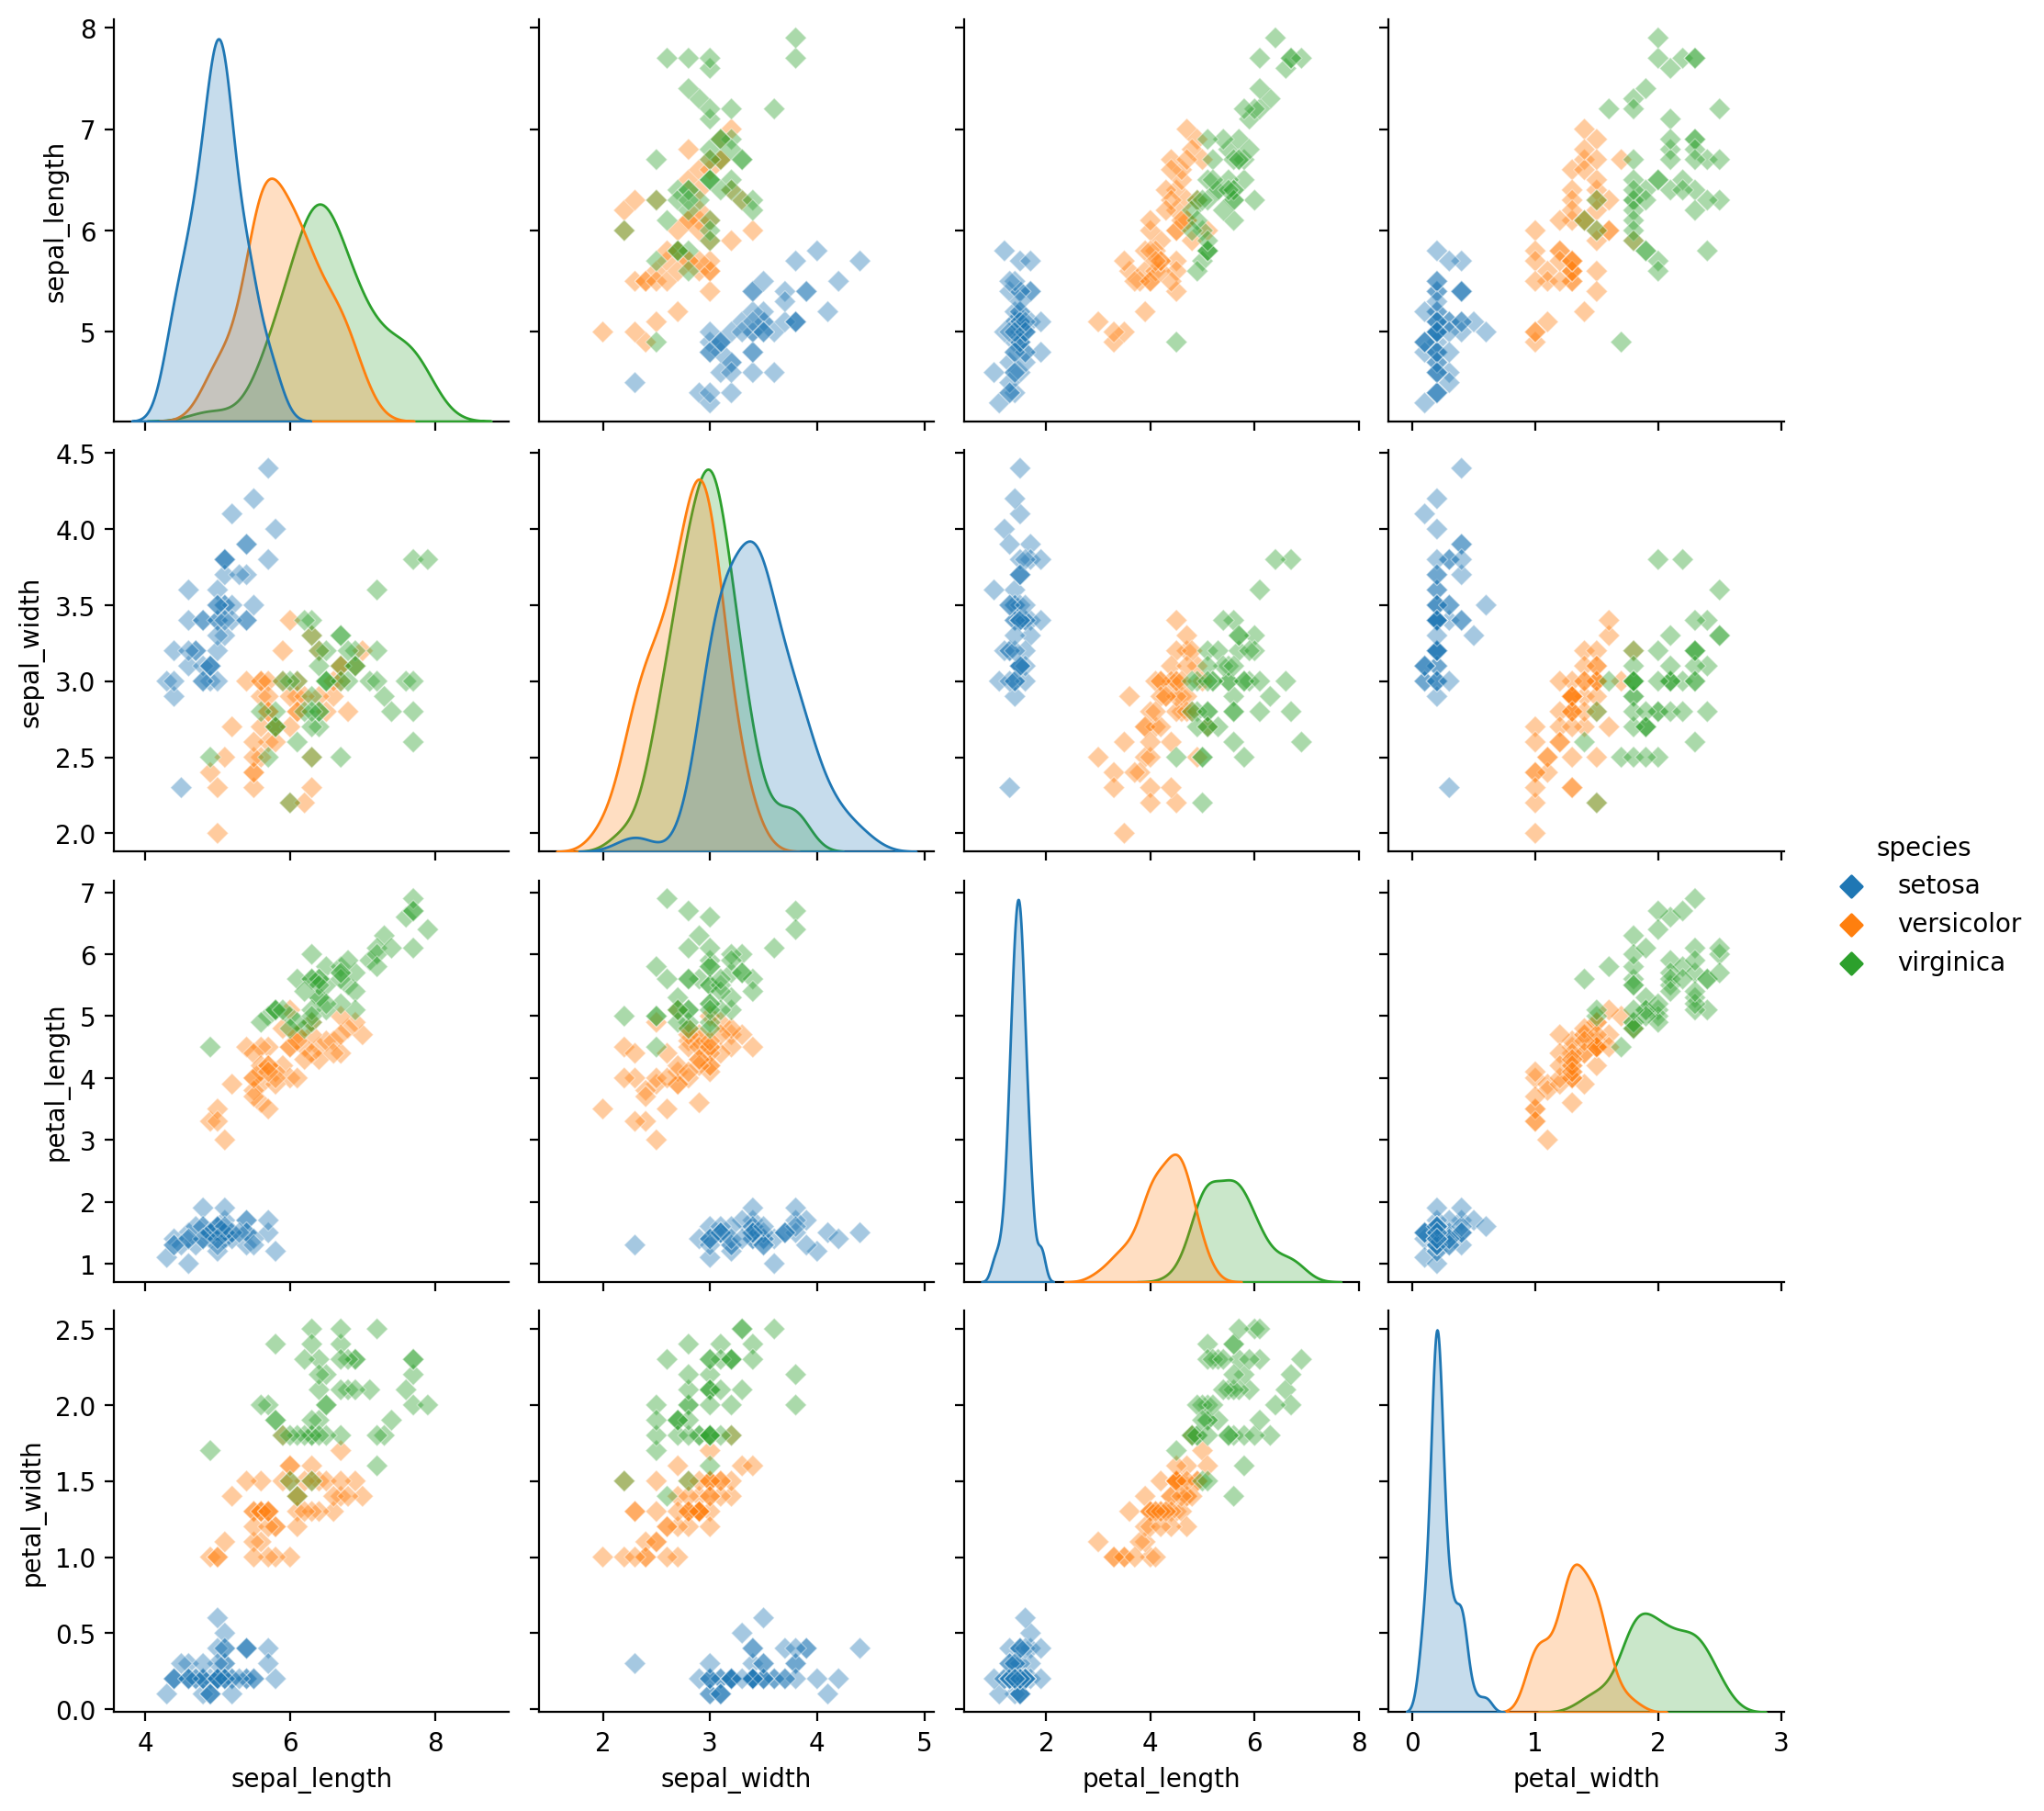

In [23]:
sns.pairplot(df, vars = cols, hue = 'species', markers = ['D', 'D', 'D'], plot_kws = {'alpha': .4});

### PCA : Principal Component Analysis

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [25]:
df[cols]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### StandardScaler (z-score)

$$s = \frac{x_{i} - \bar{x}}{sd}$$

In [26]:
X = df[cols]
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [27]:
scaler = StandardScaler()
scaler

StandardScaler()

In [30]:
X_t = scaler.fit_transform(X)
X_t

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
scaler.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [32]:
df[cols].mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [33]:
scaler.var_

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [34]:
np.sqrt(scaler.var_)

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [35]:
X_t[:5].round(4)

array([[-0.9007,  1.0321, -1.3413, -1.313 ],
       [-1.143 , -0.125 , -1.3413, -1.313 ],
       [-1.3854,  0.3378, -1.3981, -1.313 ],
       [-1.5065,  0.1064, -1.2844, -1.313 ],
       [-1.0218,  1.2635, -1.3413, -1.313 ]])

In [37]:
# put the z score into a DataFrame

dz = pd.DataFrame(X_t.round(4), columns = [f'z_{c}' for c in cols])
dz

,z_sepal_length,z_sepal_width,z_petal_length,z_petal_width
0,-0.9007,1.0321,-1.3413,-1.3130
1,-1.1430,-0.1250,-1.3413,-1.3130
2,-1.3854,0.3378,-1.3981,-1.3130
3,-1.5065,0.1064,-1.2844,-1.3130
4,-1.0218,1.2635,-1.3413,-1.3130
...,...,...,...,...
145,1.0380,-0.1250,0.8196,1.4480
146,0.5533,-1.2820,0.7059,0.9221
147,0.7957,-0.1250,0.8196,1.0535
148,0.4322,0.8007,0.9334,1.4480


In [39]:
# combine df with dz using column wise

pd.concat([df, dz], axis = 'columns')

,sepal_length,sepal_width,petal_length,petal_width,species,z_sepal_length,z_sepal_width,z_petal_length,z_petal_width
0,5.1,3.5,1.4,0.2,setosa,-0.9007,1.0321,-1.3413,-1.3130
1,4.9,3.0,1.4,0.2,setosa,-1.1430,-0.1250,-1.3413,-1.3130
2,4.7,3.2,1.3,0.2,setosa,-1.3854,0.3378,-1.3981,-1.3130
3,4.6,3.1,1.5,0.2,setosa,-1.5065,0.1064,-1.2844,-1.3130
4,5.0,3.6,1.4,0.2,setosa,-1.0218,1.2635,-1.3413,-1.3130
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.0380,-0.1250,0.8196,1.4480
146,6.3,2.5,5.0,1.9,virginica,0.5533,-1.2820,0.7059,0.9221
147,6.5,3.0,5.2,2.0,virginica,0.7957,-0.1250,0.8196,1.0535
148,6.2,3.4,5.4,2.3,virginica,0.4322,0.8007,0.9334,1.4480


In [42]:
(df['sepal_length'] - scaler.mean_[0])/np.sqrt(scaler.var_[0])

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal_length, Length: 150, dtype: float64

In [43]:
X_t[:, 0]

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

In [44]:
X_t[:, 0].mean().round(4)

-0.0

In [45]:
np.sqrt(X_t[:, 0].var())

1.0

In [46]:
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [47]:
X_t[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [48]:
X_t.shape

(150, 4)

In [49]:
X_t.shape[1]

4